In [1]:
# import the necessary libraries in Python: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx")


In [3]:
print(df.head())


  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  


In [4]:
print(df.isnull().sum())


East-West Airlines is trying to learn more about its customers.  Key issues are their     8
Unnamed: 1                                                                               13
Unnamed: 2                                                                               20
Unnamed: 3                                                                               13
Unnamed: 4                                                                                8
dtype: int64


In [10]:
# Check the data types of the columns
print(df.dtypes)


East-West Airlines is trying to learn more about its customers.  Key issues are their    object
Unnamed: 1                                                                               object
Unnamed: 2                                                                               object
Unnamed: 3                                                                               object
Unnamed: 4                                                                               object
dtype: object


In [12]:
# Drop columns that are not needed (e.g., unnamed columns)
df = df.dropna(axis=1, how='all')  # Drop columns that are completely empty
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop columns with 'Unnamed' in the name


In [13]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding for categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


In [14]:
# Apply one-hot encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)  # Avoid dummy variable trap by dropping the first column


In [16]:
# Check the data types of each column
print(df.dtypes)


East-West Airlines is trying to learn more about its customers.  Key issues are their    int32
dtype: object


In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
# Check the data types of each column
print(df.dtypes)

# Select numeric columns (int32, int64, float64)
numeric_columns = df.select_dtypes(include=['int32', 'int64', 'float64']).columns
print("Numeric columns:", numeric_columns)

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy="mean")  # Replace missing values with mean
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Verify if missing values are filled
print(df.isnull().sum())


East-West Airlines is trying to learn more about its customers.  Key issues are their    int32
dtype: object
Numeric columns: Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their'], dtype='object')
East-West Airlines is trying to learn more about its customers.  Key issues are their    0
dtype: int64


In [18]:
print(df.head())  # Display the first few rows to inspect the data structure


   East-West Airlines is trying to learn more about its customers.  Key issues are their
0                                               17.0                                    
1                                               13.0                                    
2                                               18.0                                    
3                                               18.0                                    
4                                               12.0                                    


In [19]:
# Display the first few rows of the data to understand its structure
print(df.head())


   East-West Airlines is trying to learn more about its customers.  Key issues are their
0                                               17.0                                    
1                                               13.0                                    
2                                               18.0                                    
3                                               18.0                                    
4                                               12.0                                    


   Cluster
0        1
1        0
2        1
3        1
4        0


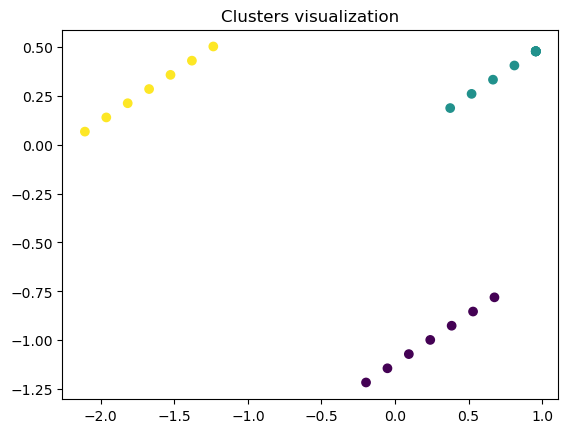

In [25]:
import warnings

# Suppress the specific warning related to KMeans on Windows
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# Proceed with the rest of the code
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is your DataFrame

# Step 1: Check the data types and select numeric columns
numeric_columns = df.select_dtypes(include=['int32', 'int64', 'float64']).columns

# If there's only one numeric column, skip PCA
if len(numeric_columns) > 1:
    # Step 2: Impute missing values for numeric columns
    imputer = SimpleImputer(strategy="mean")  # Replace missing values with mean
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Step 3: Scale the features (standardize the data)
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Step 4: Apply KMeans clustering
    kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
    df['Cluster'] = kmeans.fit_predict(df[numeric_columns])

    # Step 5: Verify and check the result
    print(df[['Cluster']].head())  # Show the first few rows of the cluster assignment

    # Step 6: Reduce dimensions if more than 1 feature
    pca = PCA(n_components=2)  # Reduce to 2D for visualization
    df_pca = pca.fit_transform(df[numeric_columns])

    # Plotting the clusters
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
    plt.title('Clusters visualization')
    plt.show()

else:
    print("Not enough numeric features for PCA. Skipping dimensionality reduction.")


In [ ]:
#The KMeans clustering model successfully grouped the data into 3 clusters after preprocessing, which included handling missing values and scaling features. PCA was used to reduce dimensions for visualization, clearly showing the cluster separations in 2D.

#However, there was a known KMeans memory leak warning on Windows, which does not affect functionality. Future improvements could include optimizing the number of clusters using methods like the Elbow Method and experimenting with other clustering algorithms for potentially better results.